In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd

pd.set_option("display.max_rows", 160)
pd.set_option("display.max_colwidth", 1000)

### Questions
* Do we only consider only cash loans / revolving loans / both (NAME_CONTRACT_TYPE)

### Remarks
* Remove:
  * GENDER (biases)

### To investigate
* AMT_ANNUITY
* NAME_TYPE_SUITE

### Delete consideration
* WEEKDAY_APPR_PROCESS_START
* HOUR_APPR_PROCESS_START
* REG_REGION_NOT_LIVE_REGION
* REG_REGION_NOT_WORK_REGION
* LIVE_REGION_NOT_WORK_REGION
* REG_CITY_NOT_LIVE_CITY
* REG_CITY_NOT_WORK_CITY
* LIVE_CITY_NOT_WORK_CITY

### Somehow aggregate
* APARTMENTS_AVG
* BASEMENTAREA_AVG
* YEARS_BEGINEXPLUATATION_AVG
* YEARS_BUILD_AVG
* COMMONAREA_AVG
* ELEVATORS_AVG
* ENTRANCES_AVG
* FLOORSMAX_AVG
* FLOORSMIN_AVG
* LANDAREA_AVG
* LIVINGAPARTMENTS_AVG
* LIVINGAREA_AVG
* NONLIVINGAPARTMENTS_AVG
* NONLIVINGAREA_AVG
* APARTMENTS_MODE
* BASEMENTAREA_MODE
* YEARS_BEGINEXPLUATATION_MODE
* YEARS_BUILD_MODE
* COMMONAREA_MODE
* ELEVATORS_MODE
* ENTRANCES_MODE
* FLOORSMAX_MODE
* FLOORSMIN_MODE
* LANDAREA_MODE
* LIVINGAPARTMENTS_MODE
* LIVINGAREA_MODE
* NONLIVINGAPARTMENTS_MODE
* NONLIVINGAREA_MODE
* APARTMENTS_MEDI
* BASEMENTAREA_MEDI
* YEARS_BEGINEXPLUATATION_MEDI
* YEARS_BUILD_MEDI
* COMMONAREA_MEDI
* ELEVATORS_MEDI
* ENTRANCES_MEDI
* FLOORSMAX_MEDI
* FLOORSMIN_MEDI
* LANDAREA_MEDI
* LIVINGAPARTMENTS_MEDI
* LIVINGAREA_MEDI
* NONLIVINGAPARTMENTS_MEDI
* NONLIVINGAREA_MEDI
* FONDKAPREMONT_MODE
* HOUSETYPE_MODE
* TOTALAREA_MODE
* WALLSMATERIAL_MODE
* EMERGENCYSTATE_MODE
* FLAG_DOCUMENT_1-21

In [3]:
columns_descriptions = pd.read_csv("data/raw/columns_description.csv")
columns_descriptions

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [4]:
application = pd.read_parquet("data/raw/application_data.parquet")
previous_application = pd.read_parquet("data/raw/previous_application.parquet")

In [5]:
application.join(previous_application, on="SK_ID_CURR", rsuffix="previous_", how="left")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Connectivity,10.0,high,POS mobile with interest,365243.0,-2004.0,-1734.0,-1914.0,-1908.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Connectivity,12.0,low_normal,POS mobile with interest,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,5.0,low_normal,POS mobile without interest,365243.0,-1308.0,-1188.0,-1188.0,-1181.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Connectivity,6.0,high,POS mobile with interest,365243.0,-1323.0,-1173.0,-1173.0,-1165.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Connectivity,10.0,high,POS mobile with interest,365243.0,-1663.0,-1393.0,-1393.0,-1388.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,XNA,60.0,low_normal,Cash X-Sell: low,365243.0,-537.0,1233.0,-177.0,-172.0,1.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,XNA,6.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,XNA,0.0,XNA,Card X-Sell,-282.0,-242.0,365243.0,365243.0,365243.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,XNA,18.0,middle,Cash X-Sell: middle,365243.0,-427.0,83.0,365243.0,365243.0,1.0


In [6]:
na_cols_mask = application.isna().any().values
columns_with_nas = application.columns[na_cols_mask]
application.isna().sum()[columns_with_nas]

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

by now dont use previous_application data`
get only cash loans

extract target:
* TARGET

drop cuz makes no sense:
* CODE_GENDER
* NAME_TYPE_SUITE
* DAYS_LAST_PHONE_CHANGE
* AMT_REQ_CREDIT_BUREAU_HOUR
* AMT_REQ_CREDIT_BUREAU_DAY
* AMT_REQ_CREDIT_BUREAU_WEEK
* AMT_REQ_CREDIT_BUREAU_MON
* AMT_REQ_CREDIT_BUREAU_QRT
* AMT_REQ_CREDIT_BUREAU_YEAR
* SK_ID_CURR
* DAYS_ID_PUBLISH
* WEEKDAY_APPR_PROCESS_START
* HOUR_APPR_PROCESS_START

special preprocessing:
* DAYS_BIRTH
* DAYS_EMPLOYED
* DAYS_REGISTRATION

drop rows with missing:
* AMT_ANNUITY
* AMT_GOODS_PRICE
* CNT_FAM_MEMBERS

categorize and create category to None:
* OWN_CAR_AGE
* OCCUPATION_TYPE

impute with median:
* APARTMENTS_AVG
* BASEMENTAREA_AVG
* YEARS_BEGINEXPLUATATION_AVG
* YEARS_BUILD_AVG
* COMMONAREA_AVG
* ELEVATORS_AVG
* ENTRANCES_AVG
* FLOORSMAX_AVG
* FLOORSMIN_AVG
* LANDAREA_AVG
* LIVINGAPARTMENTS_AVG
* LIVINGAREA_AVG
* NONLIVINGAPARTMENTS_AVG
* NONLIVINGAREA_AVG
* APARTMENTS_MODE
* BASEMENTAREA_MODE
* YEARS_BEGINEXPLUATATION_MODE
* YEARS_BUILD_MODE
* COMMONAREA_MODE
* ELEVATORS_MODE
* ENTRANCES_MODE
* FLOORSMAX_MODE
* FLOORSMIN_MODE
* LANDAREA_MODE
* LIVINGAPARTMENTS_MODE
* LIVINGAREA_MODE
* NONLIVINGAPARTMENTS_MODE
* NONLIVINGAREA_MODE
* APARTMENTS_MEDI
* BASEMENTAREA_MEDI
* YEARS_BEGINEXPLUATATION_MEDI
* YEARS_BUILD_MEDI
* COMMONAREA_MEDI
* ELEVATORS_MEDI
* ENTRANCES_MEDI
* FLOORSMAX_MEDI
* FLOORSMIN_MEDI
* LANDAREA_MEDI
* LIVINGAPARTMENTS_MEDI
* LIVINGAREA_MEDI
* NONLIVINGAPARTMENTS_MEDI
* NONLIVINGAREA_MEDI
* FONDKAPREMONT_MODE
* HOUSETYPE_MODE
* TOTALAREA_MODE
* WALLSMATERIAL_MODE
* EMERGENCYSTATE_MODE

Impute with 0:
* OBS_30_CNT_SOCIAL_CIRCLE
* DEF_30_CNT_SOCIAL_CIRCLE
* OBS_60_CNT_SOCIAL_CIRCLE
* DEF_60_CNT_SOCIAL_CIRCLE

In [7]:
application["DAYS_REGISTRATION"].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

count    307511.000000
mean      -2127.607416
std        4709.095755
min      -12175.000000
25%           9.000000
50%          40.000000
75%          92.000000
max         597.000000
Name: DAYS_EMPLOYED, dtype: float64

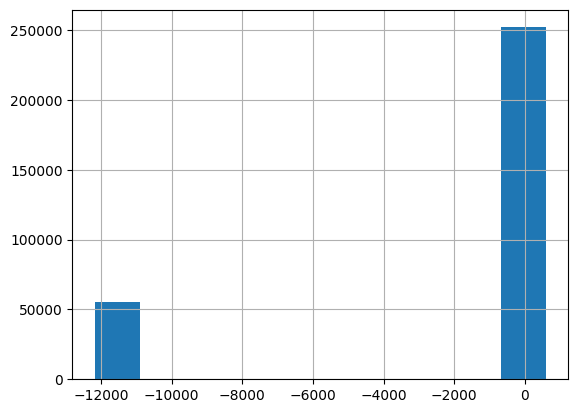

In [8]:
months_employed=-application["DAYS_EMPLOYED"]//30
months_employed.hist()
months_employed.describe()
# Propose segmentation (-inf, 6), (6, 24), (24, 60), 60+
# Needed further reseearch on negative values, now I consider them as invalid

count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: DAYS_REGISTRATION, dtype: float64

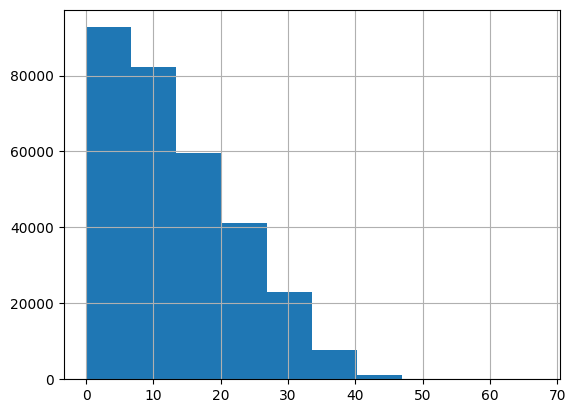

In [9]:
years_registration=-application["DAYS_REGISTRATION"]//365
years_registration.hist()
years_registration.describe()
# Propose segmentation (0, 5), (5, 10), (10, 20), 20+

<AxesSubplot:>

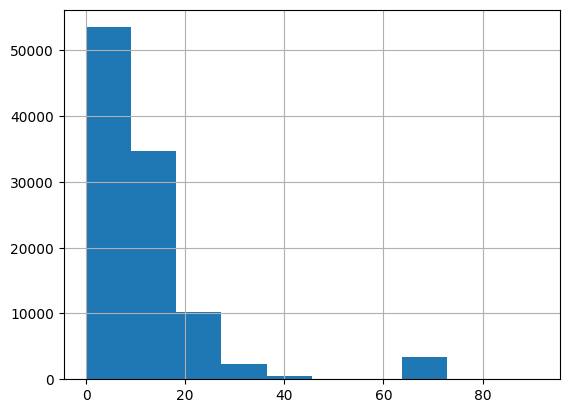

In [10]:
application["OWN_CAR_AGE"].hist()